# 6 - Customer Segmentation - Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",150)

In [2]:
df=pd.read_csv("PBL5recommendationdata.csv", encoding="latin-1")

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,...,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5284,3758,2310.0,"Basic Rollators, Green",NaN,NaN,NaN,...,NaN,62.0,B00I6GQE0A,NaN,health-care-products,NaN,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,NaN,NaN,NaN,NaN,NaN,NaN,8000064C-1434298761,1.450325e+09,NaN,NaN,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...",NaN,NaN,NaN,"Basic Lightweight Rollators For Adults, With S...",NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,Na

In [4]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [5]:
df.shape

(4194, 181)

In [6]:
df["Customers.id"].nunique()

3054

In [7]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [8]:
df["Orders.payment_date"].isnull().sum()

18

In [9]:
df["Orders.placed_date"].isnull().sum()

0

### Feature Engineering

In [10]:
# Latest date
latest_date=df["Orders.placed_date"].max()

In [11]:
df["time_with_company"]=latest_date-df["Customers.create_date"]

In [12]:
grouped=df.groupby("Customers.id")

In [13]:
df["total_spending"]=grouped["Orders.total"].transform("sum")

In [14]:
df["no_of_interactions"]=grouped["Orders.id"].transform("nunique")

In [15]:
df["last_interaction"]=grouped["Orders.placed_date"].transform("max")

In [16]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,...,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost,time_with_company,total_spending,no_of_interactions,last_interaction
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5284,3758,2310.0,"Basic Rollators, Green",NaN,NaN,NaN,...,health-care-products,NaN,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,NaN,NaN,NaN,NaN,NaN,NaN,8000064C-1434298761,1.450325e+09,NaN,NaN,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...",NaN,NaN,NaN,"Basic Lightweight Rollators For Adults, With S...",NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,

### Selecting only relevant columns

In [17]:
df=df[["Customers.id","Customers.customer_type","time_with_company","total_spending","no_of_interactions","last_interaction"]]

In [18]:
df.head()

,Customers.id,Customers.customer_type,time_with_company,total_spending,no_of_interactions,last_interaction
0,797,0.0,37400155,64.29,1,1426019099
1,3,0.0,77329740,108.72,2,1449603652
2,3,0.0,77329740,108.72,2,1449603652
3,4,0.0,76638616,29.55,1,1386780263
4,5,0.0,76557280,124.99,3,1410363655


In [19]:
df.shape

(4194, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customers.id             4194 non-null   int64  
 1   Customers.customer_type  3771 non-null   float64
 2   time_with_company        4194 non-null   int64  
 3   total_spending           4194 non-null   float64
 4   no_of_interactions       4194 non-null   int64  
 5   last_interaction         4194 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 196.7 KB


In [21]:
df["Customers.customer_type"].isnull().sum()

423

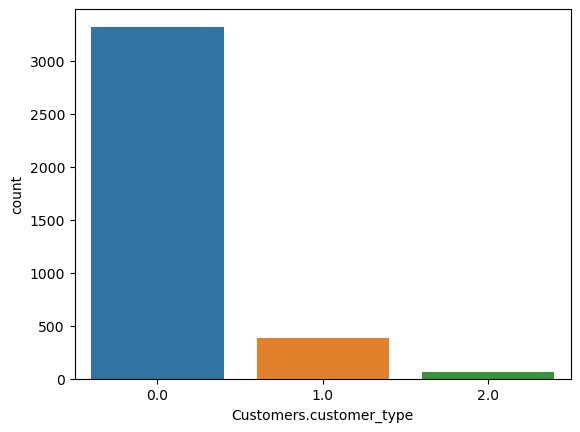

In [22]:
sns.countplot(x=df["Customers.customer_type"]);

##### Dealing with missing values

In [23]:
df["Customers.customer_type"]=df["Customers.customer_type"].fillna(df["Customers.customer_type"].mode()[0])

In [24]:
df.shape

(4194, 6)

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(3054, 6)

In [27]:
df["Customers.id"].nunique()

3054

In [28]:
df.describe()

,Customers.id,Customers.customer_type,time_with_company,total_spending,no_of_interactions,last_interaction
count,3054.000000,3054.000000,3.054000e+03,3054.000000,3054.000000,3.054000e+03
mean,1899.901441,0.125409,2.083699e+07,188.404283,1.167322,1.443452e+09
std,1073.243949,0.373091,1.872409e+07,624.932333,0.932982,1.838129e+07
min,3.000000,0.000000,8.300000e+02,2.890000,1.000000,1.386780e+09
25%,972.250000,0.000000,5.461711e+06,39.165000,1.000000,1.431968e+09
50%,1926.500000,0.000000,1.349004e+07,72.195000,1.000000,1.450728e+09
75%,2818.750000,0.000000,3.265639e+07,138.290000,1.000000,1.458347e+09
max,3736.000000,2.000000,7.732974e+07,15228.950000,18.000000,1.463419e+09


### Data Visualization

<Axes: xlabel='time_with_company', ylabel='Count'>

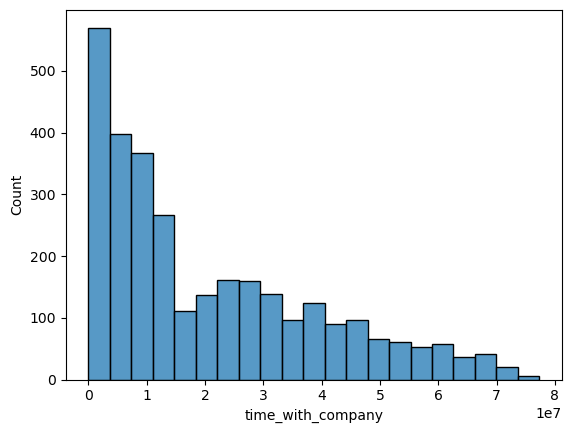

In [29]:
sns.histplot(df["time_with_company"])

<Axes: xlabel='Customers.customer_type', ylabel='count'>

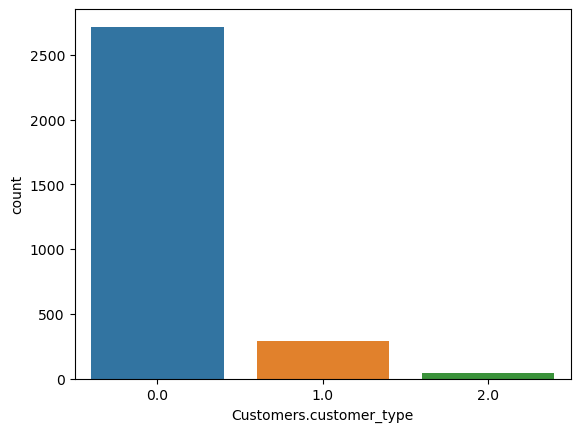

In [30]:
sns.countplot(x=df["Customers.customer_type"])

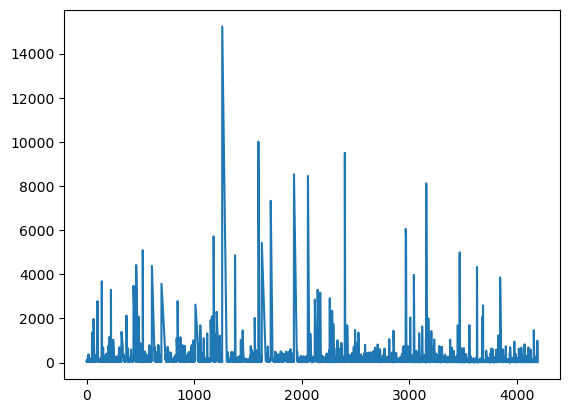

In [31]:
plt.plot(df["total_spending"])

<Axes: >

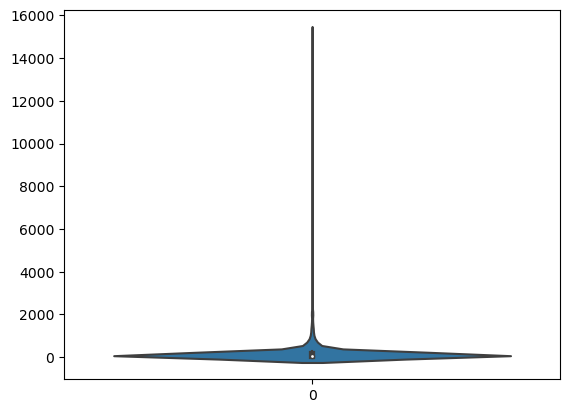

In [32]:
sns.violinplot(df["total_spending"])

<Axes: xlabel='no_of_interactions', ylabel='count'>

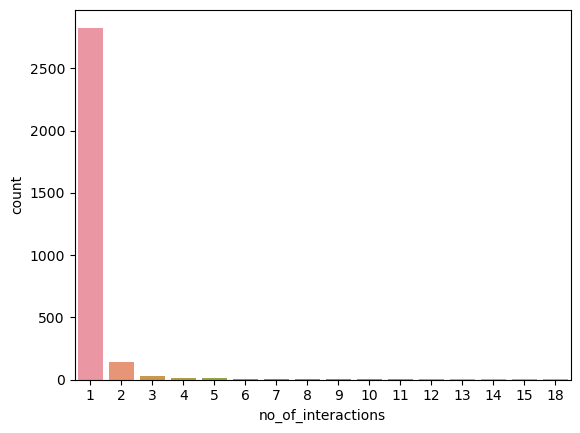

In [33]:
sns.countplot(x=df["no_of_interactions"])

<Axes: xlabel='last_interaction', ylabel='Count'>

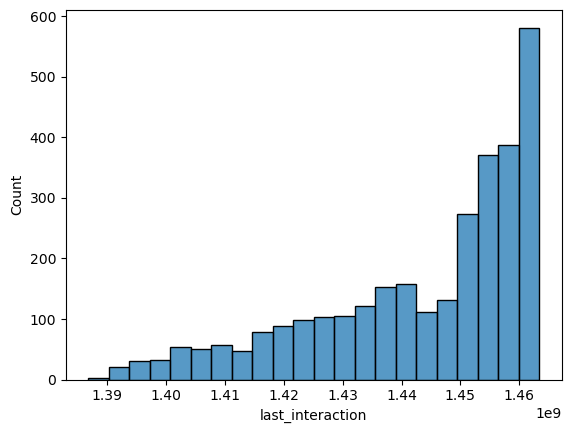

In [34]:
sns.histplot(df["last_interaction"])

### Modelling

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
x=df.drop("Customers.id",axis=1)

In [37]:
x.head()

,Customers.customer_type,time_with_company,total_spending,no_of_interactions,last_interaction
0,0.0,37400155,64.29,1,1426019099
1,0.0,77329740,108.72,2,1449603652
3,0.0,76638616,29.55,1,1386780263
4,0.0,76557280,124.99,3,1410363655
7,0.0,75262932,49.14,1,1388155947


#### Normalizing data before feeding to Clustering algorithm

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

In [40]:
columns=x.columns

In [41]:
x=scaler.fit_transform(x)

In [42]:
x=pd.DataFrame(x,columns=columns)

In [43]:
x.head()

,Customers.customer_type,time_with_company,total_spending,no_of_interactions,last_interaction
0,0.0,0.483640,0.004033,0.000000,0.511998
1,0.0,1.000000,0.006951,0.058824,0.819735
2,0.0,0.991063,0.001751,0.000000,0.000000
3,0.0,0.990011,0.008019,0.117647,0.307722
4,0.0,0.973273,0.003038,0.000000,0.017950


#### Identifying elbow point using yellowbrick package

In [44]:
from yellowbrick.cluster import KElbowVisualizer

In [45]:
model=KMeans()

In [46]:
visualizer=KElbowVisualizer(model,k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

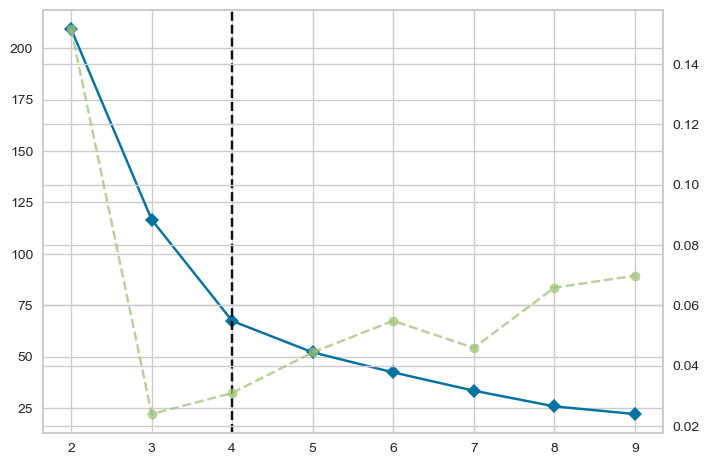

In [47]:
visualizer.fit(x)

##### 4 is the ideal cluster size

In [48]:
model=KMeans(4)

In [49]:
model=model.fit(x)

In [50]:
pred=model.predict(x)

In [51]:
x["Clusters"]=pred

In [52]:
x.head()

,Customers.customer_type,time_with_company,total_spending,no_of_interactions,last_interaction,Clusters
0,0.0,0.483640,0.004033,0.000000,0.511998,1
1,0.0,1.000000,0.006951,0.058824,0.819735,2
2,0.0,0.991063,0.001751,0.000000,0.000000,2
3,0.0,0.990011,0.008019,0.117647,0.307722,2
4,0.0,0.973273,0.003038,0.000000,0.017950,2


In [53]:
silhouette_score(x,pred)

0.8625786243162302

### Clustered Visualization

<Figure size 2000x2000 with 0 Axes>

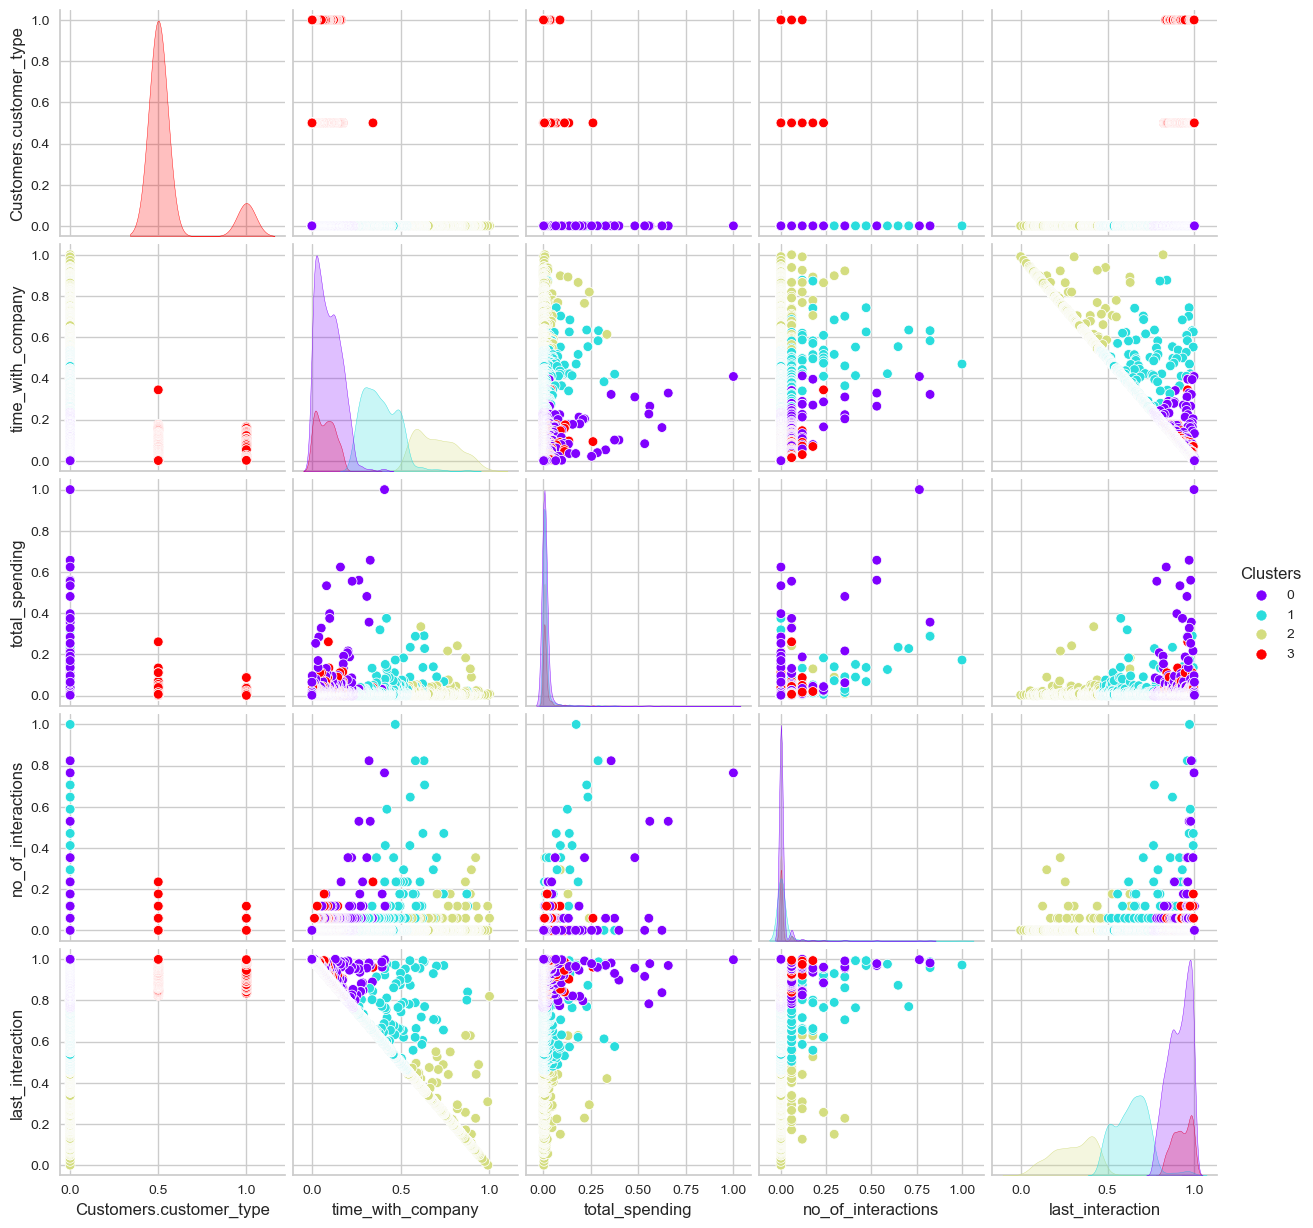

In [54]:
plt.figure(figsize=(20,20))
sns.pairplot(data=x, hue="Clusters",palette="rainbow")

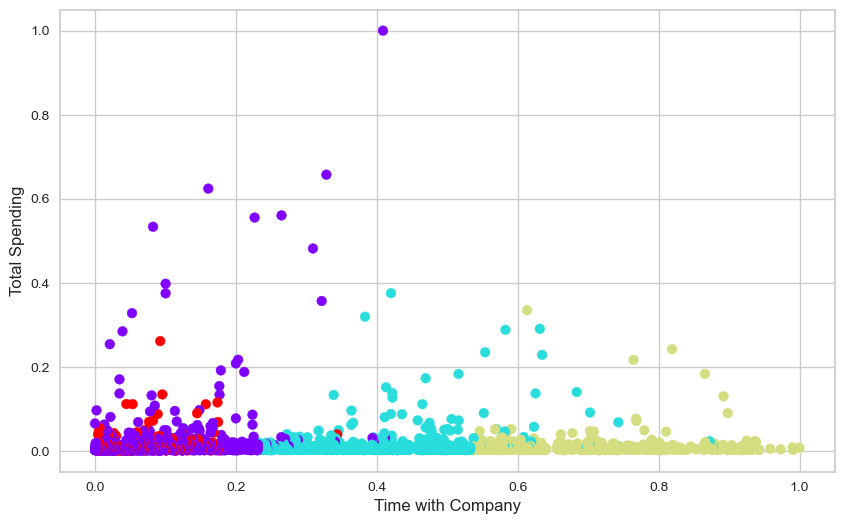

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(x["time_with_company"],x["total_spending"],c=pred,cmap="rainbow") # c=color
plt.xlabel("Time with Company")
plt.ylabel("Total Spending")
plt.show()

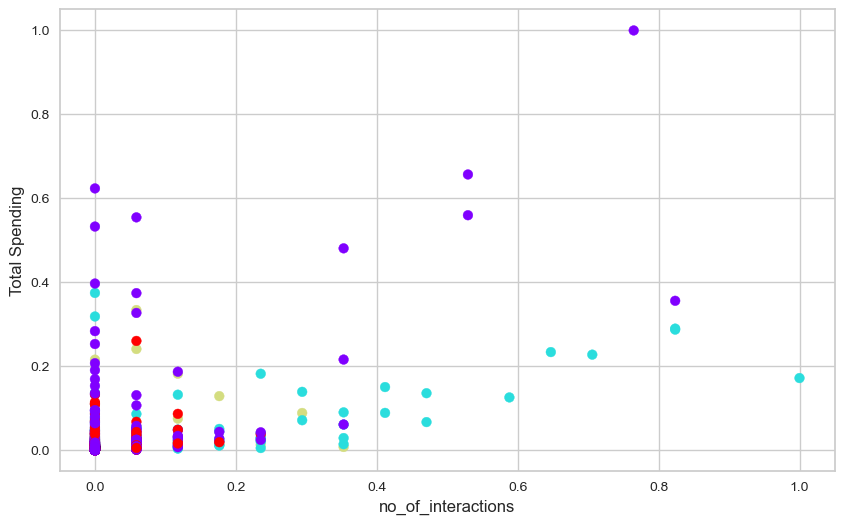

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(x["no_of_interactions"],x["total_spending"],c=pred,cmap="rainbow") # c=color
plt.xlabel("no_of_interactions")
plt.ylabel("Total Spending")
plt.show()

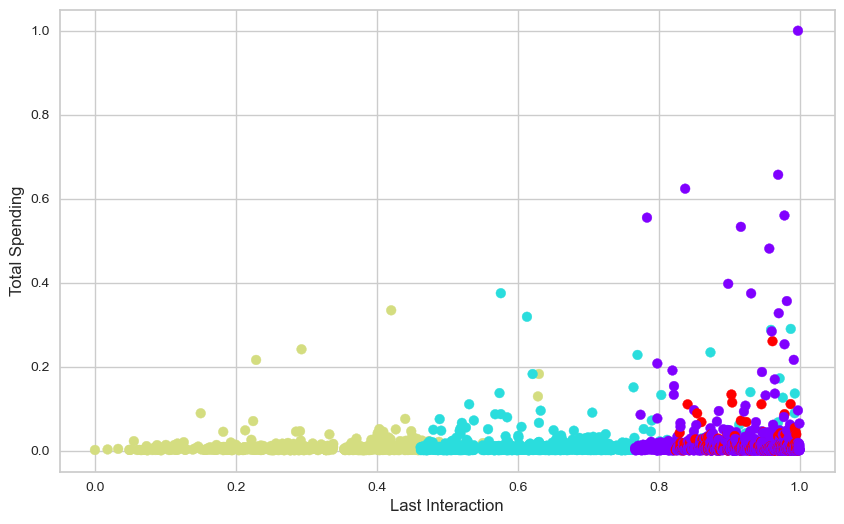

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(x["last_interaction"],x["total_spending"], c=x["Clusters"], cmap="rainbow")
plt.xlabel("Last Interaction")
plt.ylabel("Total Spending")
plt.show()

In [58]:
# plt.figure(figsize=(10, 6))
# plt.scatter(x["Customers.customer_type"],x["total_spending"], c=x["Clusters"], cmap="rainbow")
# plt.xlabel("Customer Type")
# plt.ylabel("Total Spending")
# plt.show()

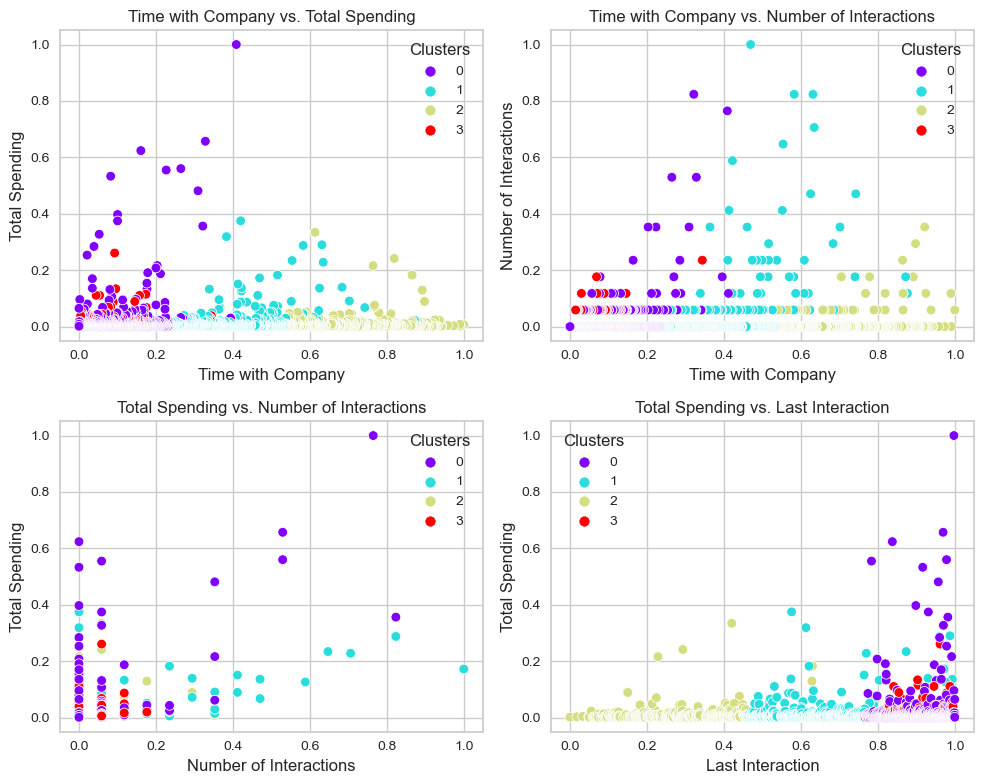

In [59]:
# Set up the figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(10,8))

# Subplot 1: Time with Company and Total Spending
sns.scatterplot(data=x, x='time_with_company', y='total_spending', hue='Clusters', ax=axs[0, 0],palette="rainbow")
axs[0, 0].set_title('Time with Company vs. Total Spending')
axs[0, 0].set_xlabel('Time with Company')
axs[0, 0].set_ylabel('Total Spending')

# Subplot 2: Time with Company and Number of Interactions
sns.scatterplot(data=x, x='time_with_company', y='no_of_interactions', hue='Clusters', ax=axs[0, 1],palette="rainbow")
axs[0, 1].set_title('Time with Company vs. Number of Interactions')
axs[0, 1].set_xlabel('Time with Company')
axs[0, 1].set_ylabel('Number of Interactions')

# Subplot 3: Total Spending and Number of Interactions
sns.scatterplot(data=x, y='total_spending', x='no_of_interactions', hue='Clusters', ax=axs[1, 0],palette="rainbow")
axs[1, 0].set_title('Total Spending vs. Number of Interactions')
axs[1, 0].set_xlabel('Number of Interactions')
axs[1, 0].set_ylabel('Total Spending')

# Subplot 4: Total Spending and Last Interaction
sns.scatterplot(data=x, x='last_interaction',y='total_spending',  hue='Clusters', ax=axs[1, 1],palette="rainbow")
axs[1, 1].set_title('Total Spending vs. Last Interaction')
axs[1, 1].set_xlabel('Last Interaction')
axs[1, 1].set_ylabel('Total Spending')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

In [60]:
x.head()

,Customers.customer_type,time_with_company,total_spending,no_of_interactions,last_interaction,Clusters
0,0.0,0.483640,0.004033,0.000000,0.511998,1
1,0.0,1.000000,0.006951,0.058824,0.819735,2
2,0.0,0.991063,0.001751,0.000000,0.000000,2
3,0.0,0.990011,0.008019,0.117647,0.307722,2
4,0.0,0.973273,0.003038,0.000000,0.017950,2


In [61]:
x['Recency'] = x['last_interaction']
x['Frequency'] = x['no_of_interactions']
x['Monetary'] = x['total_spending']

In [62]:
x.head()

,Customers.customer_type,time_with_company,total_spending,no_of_interactions,last_interaction,Clusters,Recency,Frequency,Monetary
0,0.0,0.483640,0.004033,0.000000,0.511998,1,0.511998,0.000000,0.004033
1,0.0,1.000000,0.006951,0.058824,0.819735,2,0.819735,0.058824,0.006951
2,0.0,0.991063,0.001751,0.000000,0.000000,2,0.000000,0.000000,0.001751
3,0.0,0.990011,0.008019,0.117647,0.307722,2,0.307722,0.117647,0.008019
4,0.0,0.973273,0.003038,0.000000,0.017950,2,0.017950,0.000000,0.003038


<IPython.core.display.Javascript object>


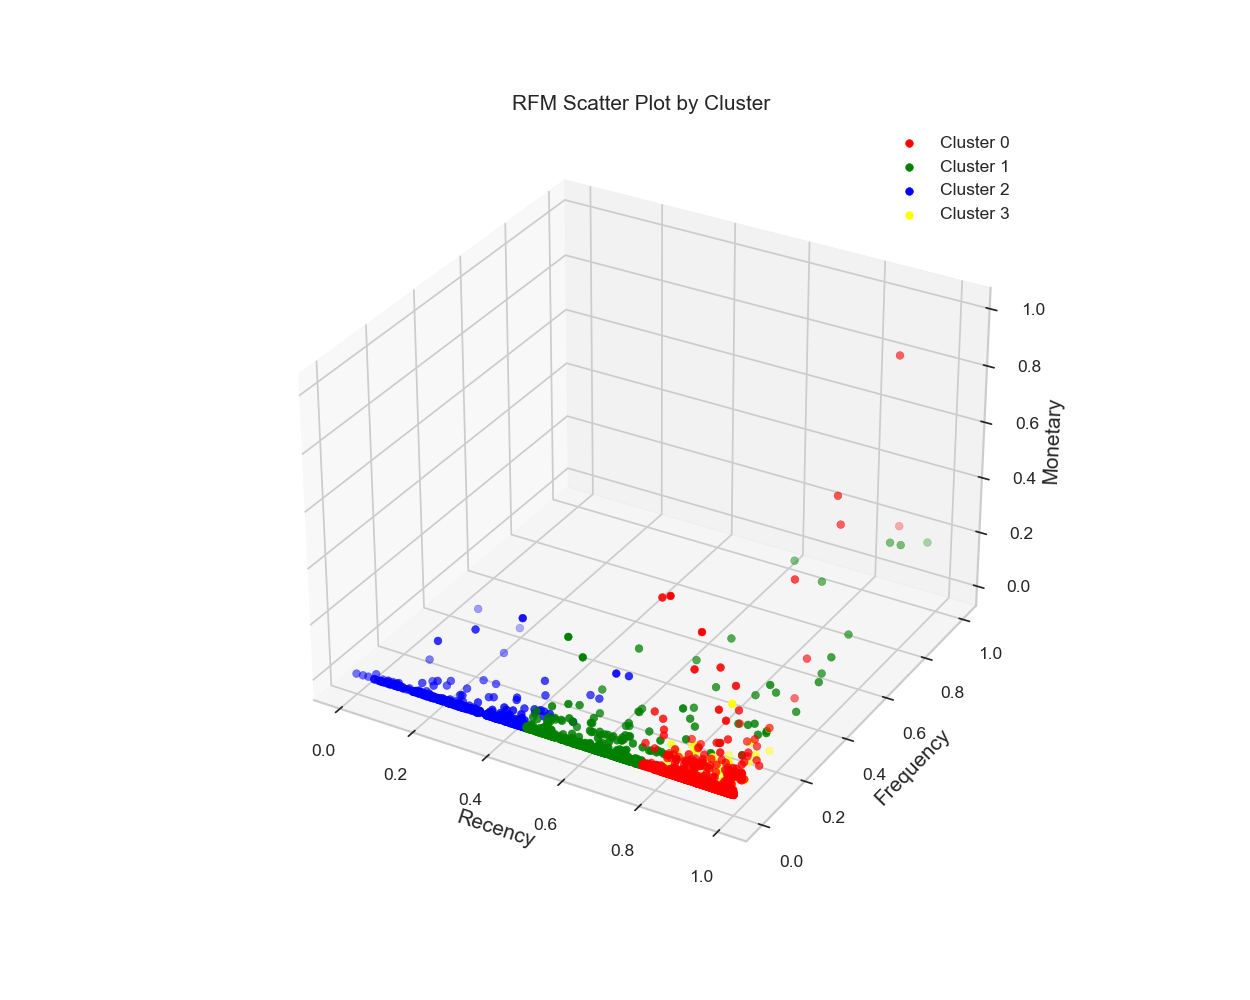

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Separate the data by cluster
cluster_0 = x[x['Clusters'] == 0]
cluster_1 = x[x['Clusters'] == 1]
cluster_2 = x[x['Clusters'] == 2]
cluster_3 = x[x['Clusters'] == 3]

# Create the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
ax.scatter(cluster_0['Recency'], cluster_0['Frequency'], cluster_0['Monetary'], c='red', label='Cluster 0')
ax.scatter(cluster_1['Recency'], cluster_1['Frequency'], cluster_1['Monetary'], c='green', label='Cluster 1')
ax.scatter(cluster_2['Recency'], cluster_2['Frequency'], cluster_2['Monetary'], c='blue', label='Cluster 2')
ax.scatter(cluster_3['Recency'], cluster_3['Frequency'], cluster_3['Monetary'], c='yellow', label='Cluster 3')

# Set labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Scatter Plot by Cluster')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
# Based on the 3d plot:
#  Blue: Occassional buyers - Low value Customers
#  Green: Regular Shoppers - Moderate value Customers
#  Red: Recent Big spenders - New High Value Customers
#  Yellow: Recent Low spenders - New Low Value Customers

## Marketing Strategies Suggestions

### Blue
**Characteristics: Less recent, less frequent, low spenders**

**Marketing Approach:** 
 * Focus on customer retention strategies to encourage repeat purchases.
 * Offer personalized discounts or promotions to incentivize higher spending.
 
### Green
**Characteristics: Moderately recent, moderately frequent, low spenders**

**Marketing Approach:** 
- Implement loyalty programs to encourage more frequent purchases.
- Offer targeted promotions based on customer preferences and buying patterns.

### Red
**Characteristics: Very recent, less frequent, moderate spenders**

**Marketing Approach:** 
- Create urgency-driven campaigns to capitalize on customers' recent activity.
- Provide exclusive offers for higher-value purchases to increase spending.

### Yellow
**Characteristics: Very recent, less frequent, low spenders**

**Marketing Approach:** 
- Implement personalized follow-up campaigns to encourage repeat purchases.
- Offer incentives for increasing the frequency of interactions with the brand.
